# Predicting Career Longevity for NBA Rookies

![Basketball](https://firstsportz.com/wp-content/uploads/2023/05/Untitled-design-2023-05-18T153510.444-1140x815.jpg)

For this project I will build a binary classification model using Scikit-learn to predict if the NBA rookie will last for 5 years in the league if provided with some information such as Games played, assists, steals and turnovers …. etc. 

---

Dataset Source : [Data world](https://data.world/exercises/logistic-regression-exercise-1)

In [38]:
import pandas as pd # load and manipulate data 
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.linear_model import LogisticRegression # import Logistic regression from sklearn
import warnings # import warnings
import sklearn.metrics as metrics # import metrics 
import seaborn as sns # import seaborn for visualization 
from sklearn.preprocessing import MinMaxScaler #import min max scaler
from IPython.display import Image # library to import image
from sklearn.metrics import confusion_matrix#confusion matrix
from yellowbrick.classifier import ROCAUC#Discriminationthreshold

In [5]:
dataFrame = pd.read_csv('nba_logreg.csv')

In [6]:
dataFrame.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

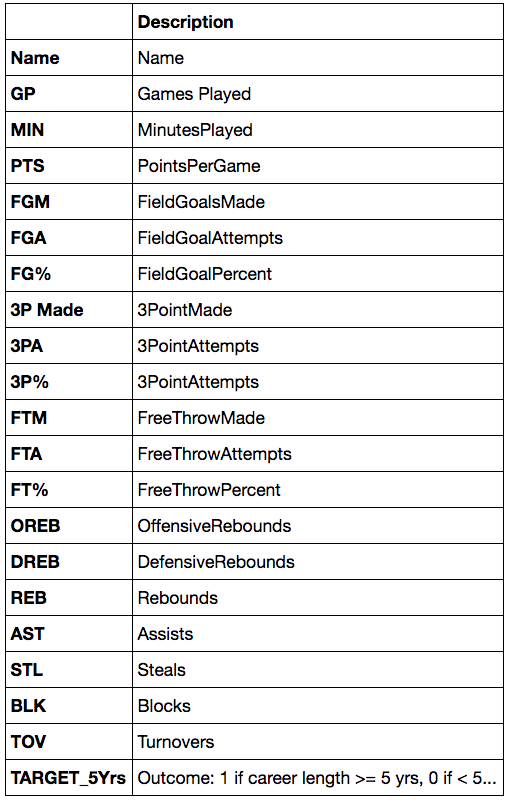

In [8]:
#Import the description table
Image(filename= "table.png", width=600, height=300)

# Find Insights in the data

In [10]:
# To check class imbalance
dataFrame['TARGET_5Yrs'].value_counts()

1.0    831
0.0    509
Name: TARGET_5Yrs, dtype: int64

In [13]:
# drop null values in dataFrame['TARGET_5Yrs'] column to balance it
dataFrame = dataFrame.dropna()

In [14]:
#Group all the observations by (Target_5yrs)
Avg_stats = dataFrame.groupby(["TARGET_5Yrs"]).mean()

In [15]:
#Test
Avg_stats

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET_5Yrs,,,,,,,,,,,,,,,,,,,
0.0,51.495030,14.276740,5.060636,1.951093,4.562425,42.270775,0.232406,0.763618,19.378131,0.928231,1.324254,69.122266,0.713519,1.522863,2.234592,1.230815,0.500000,0.249901,0.944732
1.0,65.826877,19.700847,7.891646,3.051090,6.718523,45.242131,0.260169,0.799031,19.265496,1.530872,2.133656,71.189588,1.186683,2.325061,3.511864,1.758838,0.693705,0.436925,1.349031


In [17]:
#Transpose the data frame
dataFrame_transposed = Avg_stats.T

In [18]:
#Test
dataFrame_transposed

TARGET_5Yrs,0.0,1.0
GP,51.495030,65.826877
MIN,14.276740,19.700847
PTS,5.060636,7.891646
FGM,1.951093,3.051090
FGA,4.562425,6.718523
FG%,42.270775,45.242131
3P Made,0.232406,0.260169
3PA,0.763618,0.799031
3P%,19.378131,19.265496
FTM,0.928231,1.530872


Text(0.5, 1.0, ' features values by label')

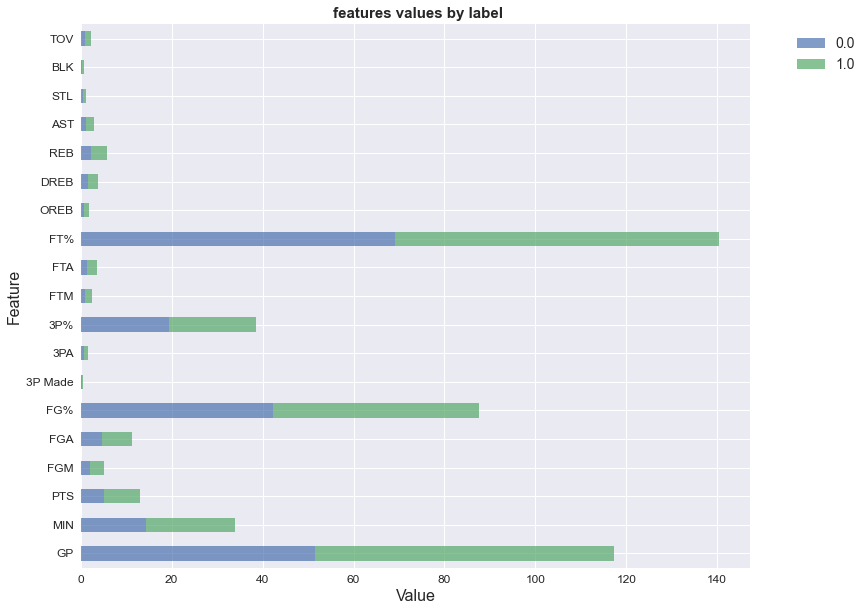

In [20]:
#Visualize the data for insights
table = dataFrame_transposed
plt.style.use('seaborn')
ax = table.plot(stacked = True, kind = 'barh', figsize = (12,10), alpha = 0.7)

#Decorating the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Value',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(' features values by label',fontsize=15,weight='bold')

# Features reduction based on correlation

In [33]:
# Labels and features split
# Here I will exclude ID column because it is not a feature 
X = dataFrame.iloc[:, 1:-1] # Features
# Y is the last column
Y = dataFrame.iloc[:,-1] # Target

<AxesSubplot:>

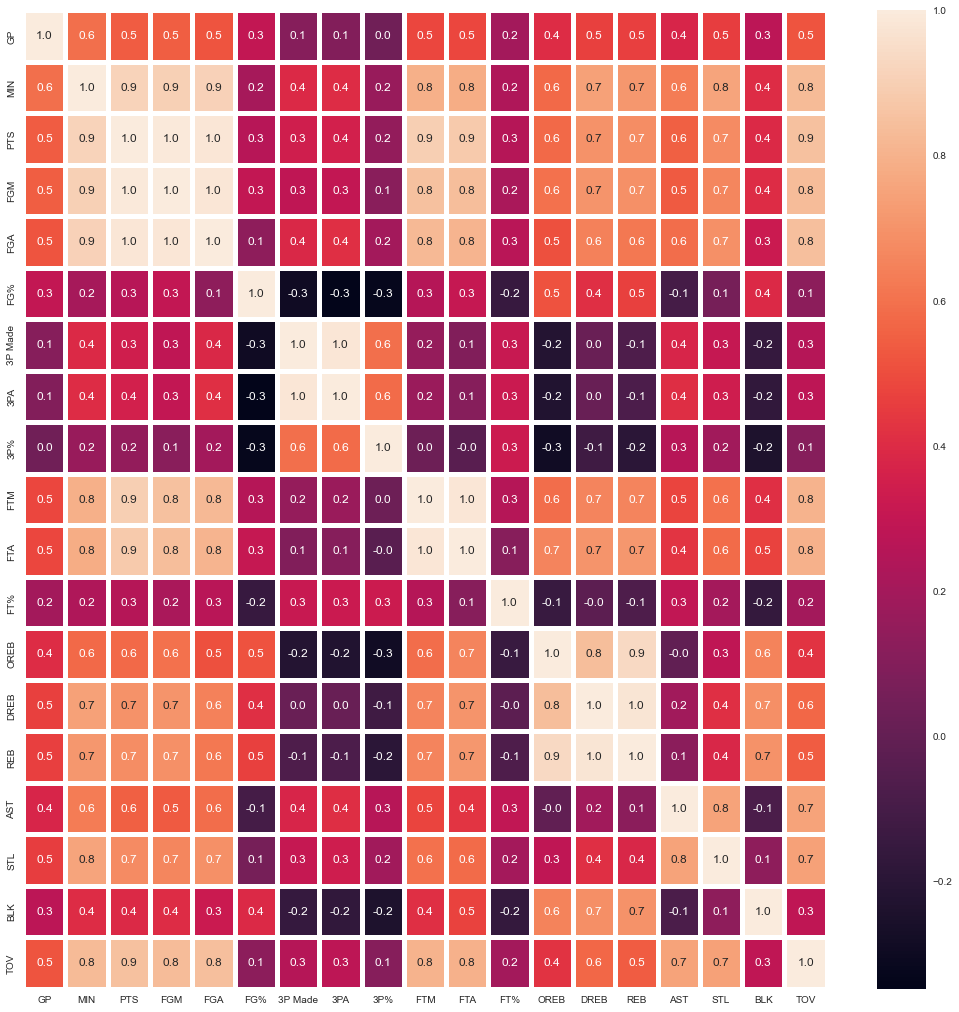

In [28]:
#correlation map
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(X.corr(), annot=True, linewidths=5, fmt='.1f', ax=ax)

In [29]:
#Drop correlated features(duplicate or very similar features)
# That is because in liner model correlated features could yield the results to be possibly numerically unstable
X = X.drop(['FGA', 'FGM', '3PA', 'FTM', 'DREB'], axis=1)

In [31]:
 # Test
X

,GP,MIN,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,34.7,0.5,25.0,2.3,69.9,0.7,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,29.6,0.7,23.5,3.4,76.5,0.5,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,42.2,0.4,24.4,1.3,67.0,0.5,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,42.6,0.1,22.6,1.3,68.9,1.0,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,52.4,0.0,0.0,1.9,67.4,1.0,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,43.3,0.0,14.3,1.5,79.2,0.4,1.2,2.5,0.6,0.2,0.8
1336,68,12.6,3.9,35.8,0.1,16.7,1.0,79.4,0.4,1.5,2.3,0.8,0.0,1.3
1337,43,12.1,5.4,55.0,0.0,0.0,1.6,64.3,1.5,3.8,0.3,0.3,0.4,0.9
1338,52,12.0,4.5,43.9,0.0,10.0,1.8,62.5,0.2,0.7,2.2,0.4,0.1,0.8


In [34]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y, random_state=42)

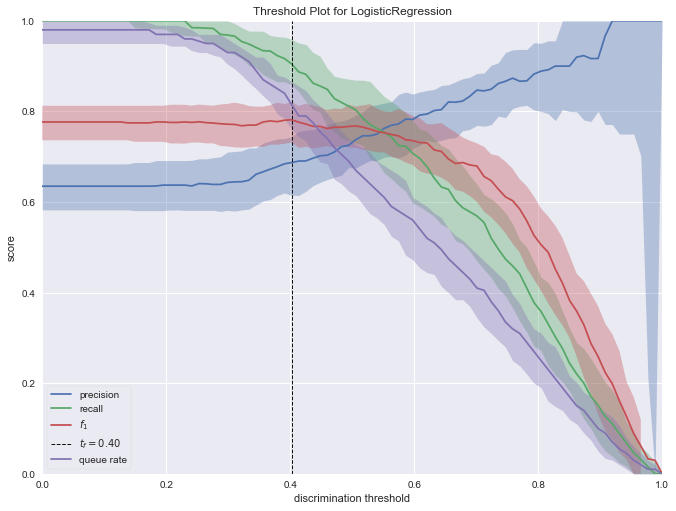

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [40]:
#Discrimination threshold plot 
from yellowbrick.classifier import DiscriminationThreshold
warnings.filterwarnings('ignore')
visualizer = DiscriminationThreshold(LogisticRegression(), size = (800,600))
visualizer.fit(X_train, y_train)
visualizer.poof()

In [60]:
#fit the logistic regression
clf = LogisticRegression().fit(X_train, y_train)

In [79]:
# labels prediction
y_pred = np.where(clf.predict_proba(X_test)[:,1]>0.35,1,0)

In [80]:
#transform y_pred array to dataframe 
y_pred = pd.DataFrame(y_preb)

In [81]:
#test
y_pred

,0
0,1
1,1
2,1
3,1
4,1
...,...
328,1
329,1
330,1
331,1


# Adjust the discrimination threshold
# The confusion matrix for discrimination threshold of 0.35

In [82]:
#F1_Score
metrics.f1_score(y_test,y_pred)

0.7919999999999999

In [83]:
#Confusion matrix 
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()
print('tn', tn)
print('fp', fp)
print('fn', fn)
print('tp', tp)

tn 31
fp 95
fn 9
tp 198


In [84]:
#test accuracy
test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_accuracy

0.6876876876876877

In [85]:
#precision score
precision_score = metrics.precision_score(y_test, y_pred)
precision_score

0.6757679180887372

In [86]:
#recall score
recall_score = metrics.precision_score(y_test, y_pred)
recall_score

0.6757679180887372